In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection and analysis

In [81]:
insurance_dataset = pd.read_csv("insurance.csv")

In [82]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
insurance_dataset.shape

(1338, 7)

### Getting info about dataset

In [84]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Check missing values

In [85]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data analysis : statistical measures of dataset

In [86]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of age value

C:\Program Files (x86)\anaco\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


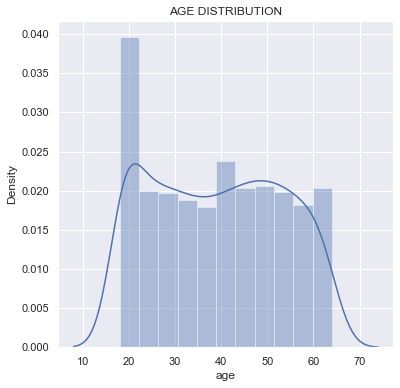

In [87]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('AGE DISTRIBUTION')
plt.show()

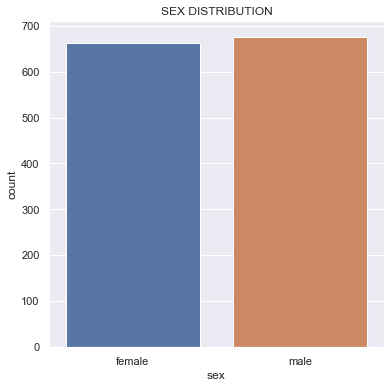

In [88]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('SEX DISTRIBUTION')
plt.show()

In [89]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Program Files (x86)\anaco\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


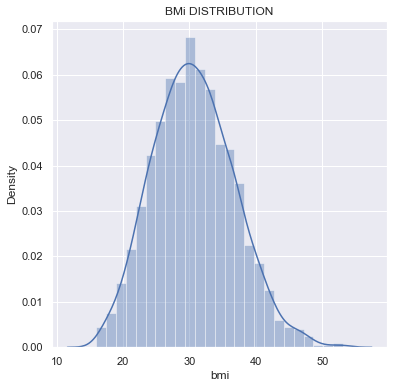

In [90]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMi DISTRIBUTION')
plt.show()

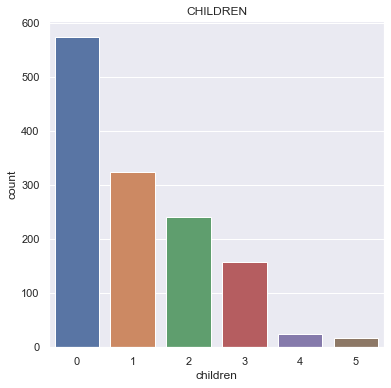

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data= insurance_dataset)
plt.title('CHILDREN')
plt.show()

In [92]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Figure size 432x432 with 0 Axes>

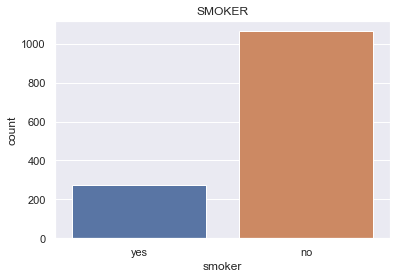

In [93]:
plt.figure(figsize= (6,6))
plt.figure('smoker')
sns.countplot(x='smoker', data= insurance_dataset)
plt.title('SMOKER')
plt.show()

In [94]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

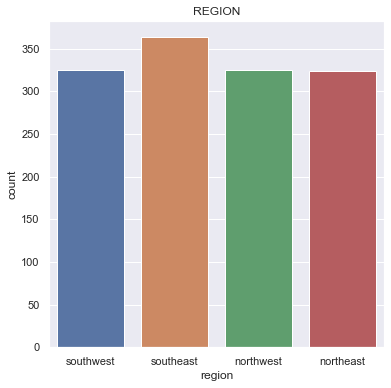

In [95]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('REGION')
plt.show()

In [96]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

C:\Program Files (x86)\anaco\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


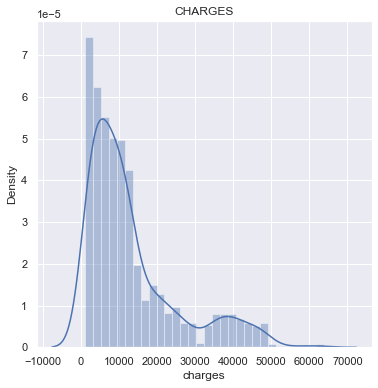

In [97]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('CHARGES')
plt.show()

### DATA PREPROCESSING

In [98]:
insurance_dataset.replace({'sex' : {'male' : 0, 'female' : 1}}, inplace=True)
insurance_dataset.replace({'smoker': {'yes':0, 'no':1}}, inplace = True)
insurance_dataset.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

### Spliting the features and target

In [99]:
x=insurance_dataset.drop(columns='charges', axis=1)
y=insurance_dataset['charges']
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [100]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


C:\Program Files (x86)\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

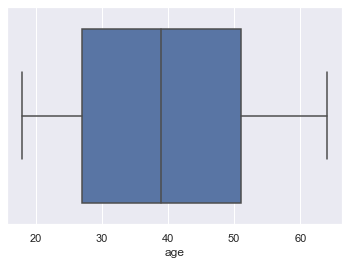

In [102]:
sns.boxplot(insurance_dataset['age'])

C:\Program Files (x86)\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

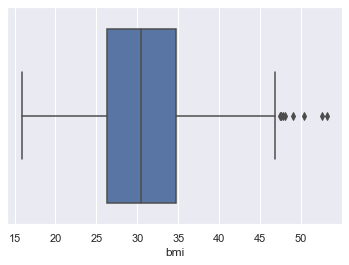

In [104]:
sns.boxplot(insurance_dataset['bmi'])

### OUTLIER HANDLING : IQR

In [108]:
q1 = np.quantile(insurance_dataset['bmi'], 0.25) # 25% value
q2 = np.quantile(insurance_dataset['bmi'], 0.50) # Median
q3 = np.quantile(insurance_dataset['bmi'], 0.75) # 75% value

IQR = q3 - q1
IQR
lower_tail = q1 - 1.5 * IQR
print("Lower Tail :", lower_tail)

upper_tail = q3 + 1.5 * IQR
print("Upper Tail :", upper_tail)

Lower Tail : 13.7
Upper Tail : 47.290000000000006


<AxesSubplot:xlabel='bmi'>

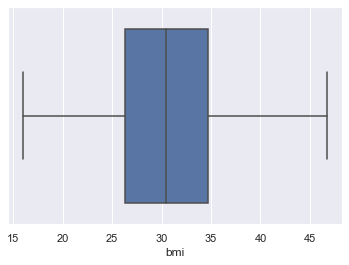

In [109]:
insurance_dataset.loc[(insurance_dataset['bmi'] > upper_tail), 'bmi'] = insurance_dataset['bmi'].quantile(0.75)
sns.boxplot(x = insurance_dataset['bmi'])

C:\Program Files (x86)\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

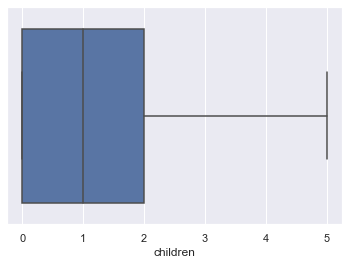

In [113]:
sns.boxplot(insurance_dataset['children'])

### Splitting data into training data and testing data

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model training : linear regression

In [125]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [126]:
training_data_prediction = regressor.predict(x_train)

In [127]:
# R squared value

In [139]:
r2_train= metrics.r2_score(y_train,training_data_prediction)
print('R Squared value_train : ', r2_train)

R Squared value_train :  0.751505643411174


In [129]:
# Prediction on training data

In [130]:
testing_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R Squared value_test : ', r2_test)

R Squared value_test :  0.7447273869684077


### KNN

In [140]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)

In [141]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.8061322906220538

In [146]:
knn_reg.fit(x_train,y_train)
train_score= knn_reg.score(x_train,y_train)
print("training data score :",train_score)

test_score=knn_reg.score(x_test,y_test)
print("testing data score :",test_score)

training data score : 0.8532136480912594
testing data score : 0.8126488409479943


### BUILDING PREDICTIVE SYSTEM

In [142]:
input_data = (25,0,26.22,0,1,2)
#converting data to numpy array
input_data_numpy = np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
prediction= knn.predict(input_data_reshaped)
print(prediction)

[15709.5493375]


In [132]:
print('The insurance cost is USD', prediction[0])

The insurance cost is USD 10657.408849921463


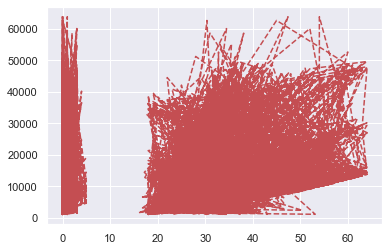

In [156]:
prediction= pd.DataFrame({'actual charges': y_test, 'predicted charges': y_pred})
#sns.pairplot(data=prediction, x='actual charges', y='predicted charges')
plt.plot(x, y, linestyle='--', color='r', label='Predicted')

In [158]:
insurance_dataset.charges[20:25]

20    13228.84695
21     4149.73600
22     1137.01100
23    37701.87680
24     6203.90175
Name: charges, dtype: float64

In [163]:
S = sc.transform(x)
y_train_pred=knn.predict(S)
y_train_pred[20:25]

array([12668.2440065,  6679.9330685,  3924.649309 , 30251.0164475,
        6705.9037475])

### Save Required Data
save model

In [167]:
import pickle
import json
with open(r'artifacts\linear_regression.pkl','wb') as f:
    pickle.dump(regressor,f)

In [171]:
with open(r'artifacts\config2.py','wb') as f:
    pickle.dump(knn,f)

### Save column names

In [183]:
column_title={'column name':x.columns.tolist(),
              'gender':{'male':0,'female':1},
              'smoker':{'yes':0,'no':1},
              'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}

with open('artifacts\column_title.json','w') as f:
    json.dump(column_title,f)

### Save scaler

In [203]:
#with open(sc.pkl,'wb') as f:
  #  pickle.dump(sc,f)
    
pickle.dump(sc, open('artifacts\scaler.pkl', 'wb'))

In [204]:
pickle.dump(knn, open('artifacts\model.pkl', 'wb'))

In [205]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1
